<a href="https://colab.research.google.com/github/github-ashwin/Python/blob/main/HandwrittenImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [38]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [39]:
X_train.shape

(60000, 28, 28)

In [40]:
X_test.shape

(10000, 28, 28)

In [41]:
X_train[0].shape

(28, 28)

6


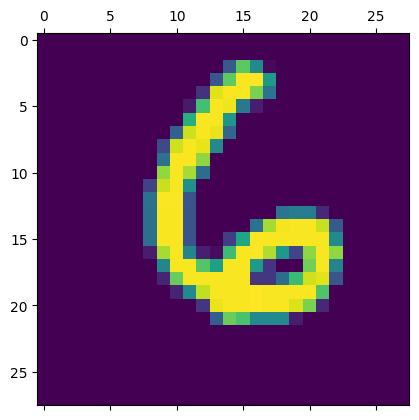

In [42]:
random = np.random.randint(0,60000)
print(y_train[random])
plt.matshow(X_train[random])

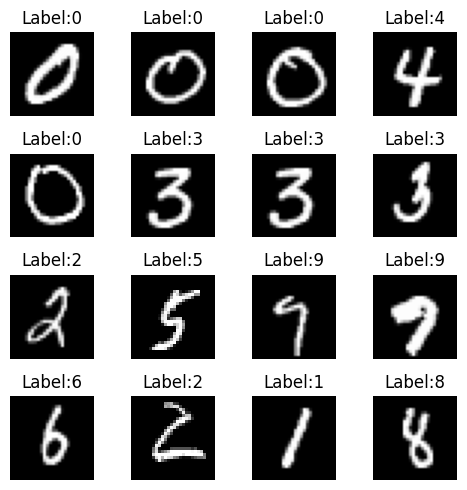

In [43]:
indices = np.random.randint(0,X_train.shape[0],size=16)

fig, axes = plt.subplots(4,4,figsize=(5,5))

axes = axes.flatten()

for i, ax in enumerate(axes):
    image = X_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image,cmap='gray')
    ax.set_title(f"Label:{label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [44]:
#Reshaping to add channel - CNN requires 4D input (number of samples, height, width, channels)
img_row , img_col = 28,28

X_train = X_train.reshape(X_train.shape[0], img_row, img_col, 1)
X_test = X_test.reshape(X_test.shape[0], img_row, img_col, 1)

In [45]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [46]:
#Normalising the value - each pixel ranges from 0-255, hence converting it to the range of 0,1
X_train = X_train/255.0
X_test = X_test/255.0

In [47]:
#Converting the class labels into One-Hot Encoding
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [48]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.9571 - loss: 0.1478 - val_accuracy: 0.9863 - val_loss: 0.0433
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 121ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9879 - val_loss: 0.0354
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.9854 - loss: 0.0485 - val_accuracy: 0.9904 - val_loss: 0.0295
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 119ms/step - accuracy: 0.9886 - loss: 0.0385 - val_accuracy: 0.9928 - val_loss: 0.0233
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.9910 - loss: 0.0309 - val_accuracy: 0.9913 - val_loss: 0.0300
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.9925 - loss: 0.0256 - val_accuracy: 0.9911 - val_loss: 0.0270
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9932 - loss: 0.0229 - val_accuracy: 0.9925 - val_loss: 0.0217
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 120ms/step - accuracy: 0.9938 - loss: 0

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 724,640 (2.76 MB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 483,094 (1.84 MB)

In [55]:
test_loss, test_acc = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9923 - loss: 0.0278


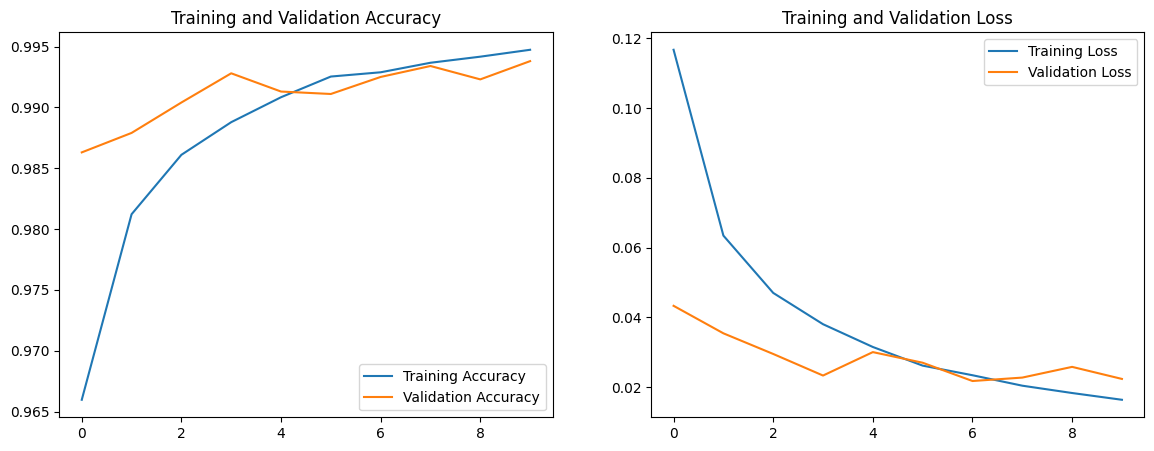

In [56]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()